In [129]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

In [130]:
def parser(s):
    return datetime.striptime(s,'%Y-%m')

In [131]:
ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=[0],index_col=0,squeeze=True)

In [132]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [133]:
heater_series = ice_cream_heater_df.heater

In [134]:
heater_series

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
              ..
2020-02-01    34
2020-03-01    25
2020-04-01    25
2020-05-01    27
2020-06-01    24
Freq: MS, Name: heater, Length: 198, dtype: int64

In [135]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(heater_series,color='red')
    plt.ylabel('Search Frequency for "Heater"', fontsize=16)
    
    for year in range(2004,2021):
        plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)

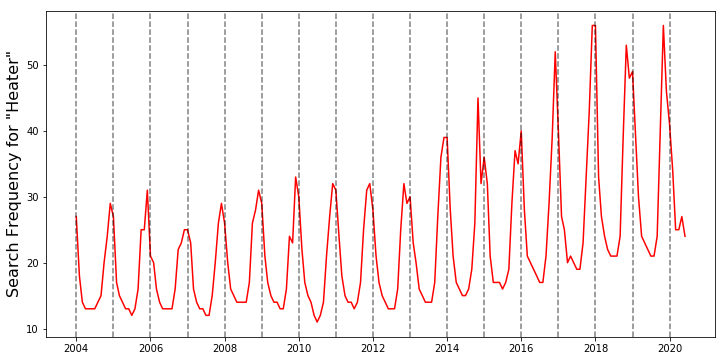

In [136]:
plot_series(heater_series)# trend

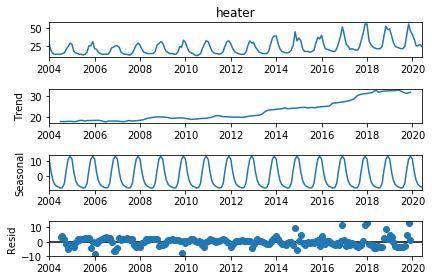

In [137]:
results = seasonal_decompose(ice_cream_heater_df['heater'])
results.plot();

In [138]:
average, std = heater_series.mean(), heater_series.std()

In [139]:
heater_series = (heater_series-average)/std # mean is center around 0 and std is now 1

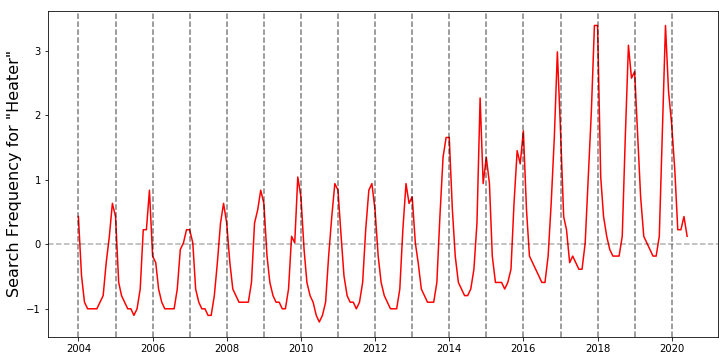

In [140]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [141]:
heater_series= heater_series.diff().dropna()

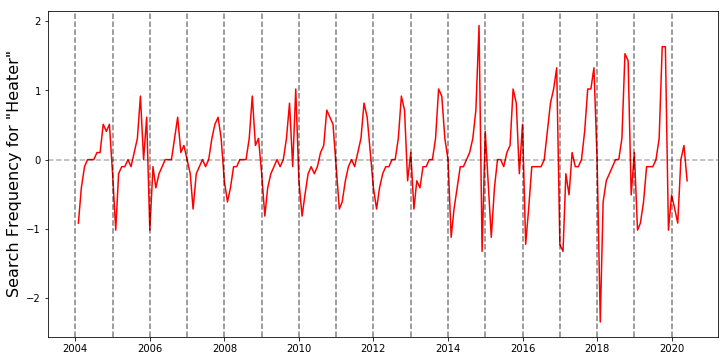

In [142]:
plot_series(heater_series)
plt.axhline(0, linestyle='--',color='k',alpha=0.3)# increasing volatility over the time in year prior 

In [143]:
annual_volatility = heater_series.groupby(heater_series.index.year).std()# it is grouping data by year and claculating yearly std

In [144]:
annual_volatility

Month
2004    0.415481
2005    0.474527
2006    0.400148
2007    0.359839
2008    0.396182
2009    0.499810
2010    0.459566
2011    0.443924
2012    0.471104
2013    0.503587
2014    0.855743
2015    0.569441
2016    0.719843
2017    0.830886
2018    0.987221
2019    0.892991
2020    0.426657
Name: heater, dtype: float64

Text(0, 0.5, 'STD')

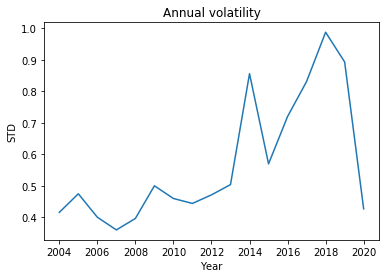

In [145]:
plt.title('Annual volatility')
plt.plot(annual_volatility)
plt.xlabel('Year')
plt.ylabel('STD')

In [146]:
heater_annual_vol= heater_series.index.map(lambda d: annual_volatility.loc[d.year])# calculating standard deviation of the year from the current datapoint

In [147]:
heater_annual_vol

Float64Index([0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837,
              ...
               0.8929910269067829,  0.8929910269067829,  0.8929910269067829,
               0.8929910269067829, 0.42665652301411994, 0.42665652301411994,
              0.42665652301411994, 0.42665652301411994, 0.42665652301411994,
              0.42665652301411994],
             dtype='float64', name='Month', length=197)

In [148]:
heater_series = heater_series / heater_annual_vol#removed incosistant volatility from our time series

Text(0, 0.5, 'STD')

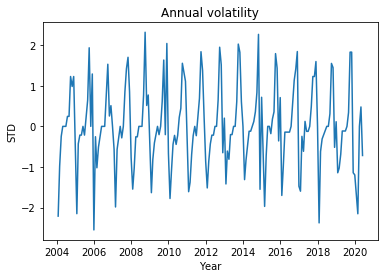

In [149]:
plt.title('Annual volatility')
plt.plot(heater_series)
plt.xlabel('Year')
plt.ylabel('STD')

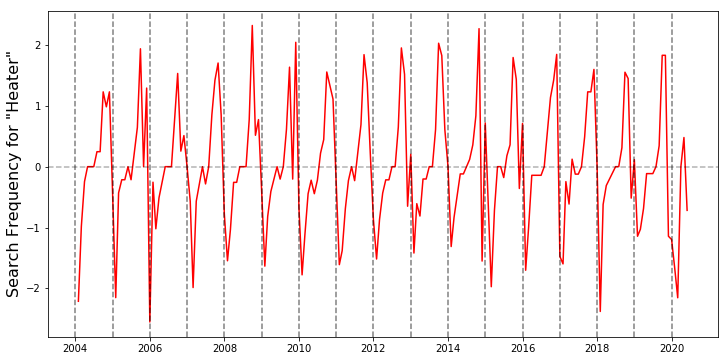

In [150]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [151]:
month_avg= heater_series.groupby(heater_series.index.month).mean()# we are taking ecach month from every year and calculating mean

In [152]:
month_avg

Month
1    -0.428360
2    -1.483129
3    -1.063595
4    -0.442926
5    -0.121663
6    -0.128425
7    -0.107093
8     0.075720
9     0.544638
10    1.613170
11    1.183118
12    0.491641
dtype: float64

In [153]:
heater_month_avg = heater_series.index.map(lambda d: month_avg.loc[d.month])

In [154]:
heater_month_avg

Float64Index([ -1.4831292771766649,  -1.0635953355687688,  -0.4429263710136824,
              -0.12166261572164781, -0.12842542811874377, -0.10709260508002622,
               0.07572031336904021,   0.5446384049209761,   1.6131699911888608,
                1.1831180641276995,
              ...
                0.5446384049209761,   1.6131699911888608,   1.1831180641276995,
                0.4916411242912192,  -0.4283597874466263,  -1.4831292771766649,
               -1.0635953355687688,  -0.4429263710136824, -0.12166261572164781,
              -0.12842542811874377],
             dtype='float64', name='Month', length=197)

In [155]:
heater_series = heater_series - heater_month_avg # removed seasonality from our time series 

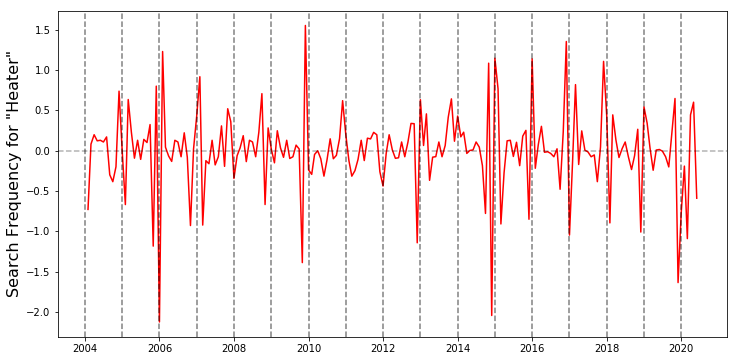

In [156]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [159]:
def adfuller_test(x):
    result= adfuller(x)
    labels = ["ADF Test Statistics","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [160]:
adfuller_test(heater_series)

ADF Test Statistics : -14.280161378347369
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 1.3281990332221657e-26
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 1
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 195
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
